In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [2]:
data=pd.read_csv("covid19.csv",parse_dates=["Date"])
data

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0
...,...,...,...,...,...
23683,2020-05-26,West Bank and Gaza,429,365,3
23684,2020-05-26,Western Sahara,9,6,1
23685,2020-05-26,Yemen,249,10,49
23686,2020-05-26,Zambia,920,336,7


In [3]:
data.dtypes

Date         datetime64[ns]
Country              object
Confirmed             int64
Recovered             int64
Deaths                int64
dtype: object

In [4]:
data.Country.value_counts()

Bahamas                   126
Togo                      126
Papua New Guinea          126
Mauritania                126
Panama                    126
                         ... 
United Arab Emirates      126
Bosnia and Herzegovina    126
Spain                     126
Montenegro                126
Fiji                      126
Name: Country, Length: 188, dtype: int64

In [5]:
data_dates=pd.DataFrame()
data_dates["month"]=data["Date"].dt.month_name()
data_dates["year"]=data["Date"].dt.year
data_dates["day"]=data["Date"].dt.day_name()
data_dates

,month,year,day
0,January,2020,Wednesday
1,January,2020,Wednesday
2,January,2020,Wednesday
3,January,2020,Wednesday
4,January,2020,Wednesday
...,...,...,...
23683,May,2020,Tuesday
23684,May,2020,Tuesday
23685,May,2020,Tuesday
23686,May,2020,Tuesday


In [6]:
data["month"]=data_dates["month"]
data["year"]=data_dates["year"]
data["day"]=data_dates["day"]
data

,Date,Country,Confirmed,Recovered,Deaths,month,year,day
0,2020-01-22,Afghanistan,0,0,0,January,2020,Wednesday
1,2020-01-22,Albania,0,0,0,January,2020,Wednesday
2,2020-01-22,Algeria,0,0,0,January,2020,Wednesday
3,2020-01-22,Andorra,0,0,0,January,2020,Wednesday
4,2020-01-22,Angola,0,0,0,January,2020,Wednesday
...,...,...,...,...,...,...,...,...
23683,2020-05-26,West Bank and Gaza,429,365,3,May,2020,Tuesday
23684,2020-05-26,Western Sahara,9,6,1,May,2020,Tuesday
23685,2020-05-26,Yemen,249,10,49,May,2020,Tuesday
23686,2020-05-26,Zambia,920,336,7,May,2020,Tuesday


In [7]:
data["type_of_day"]=np.where((data["day"]=="Sunday")|(data["day"]=="Saturday"),"weekend","weekday")

In [8]:
data

,Date,Country,Confirmed,Recovered,Deaths,month,year,day,type_of_day
0,2020-01-22,Afghanistan,0,0,0,January,2020,Wednesday,weekday
1,2020-01-22,Albania,0,0,0,January,2020,Wednesday,weekday
2,2020-01-22,Algeria,0,0,0,January,2020,Wednesday,weekday
3,2020-01-22,Andorra,0,0,0,January,2020,Wednesday,weekday
4,2020-01-22,Angola,0,0,0,January,2020,Wednesday,weekday
...,...,...,...,...,...,...,...,...,...
23683,2020-05-26,West Bank and Gaza,429,365,3,May,2020,Tuesday,weekday
23684,2020-05-26,Western Sahara,9,6,1,May,2020,Tuesday,weekday
23685,2020-05-26,Yemen,249,10,49,May,2020,Tuesday,weekday
23686,2020-05-26,Zambia,920,336,7,May,2020,Tuesday,weekday


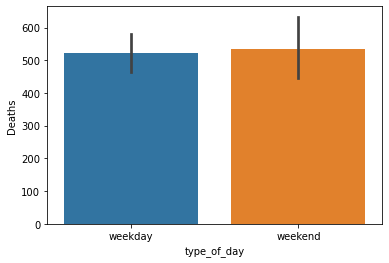

In [9]:
sns.barplot(x="type_of_day",y="Deaths",data=data)

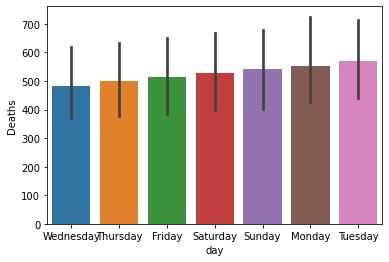

In [10]:
sns.barplot(x="day",y="Deaths",data=data)

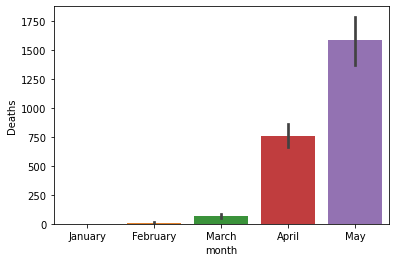

In [11]:
sns.barplot(x="month",y="Deaths",data=data)

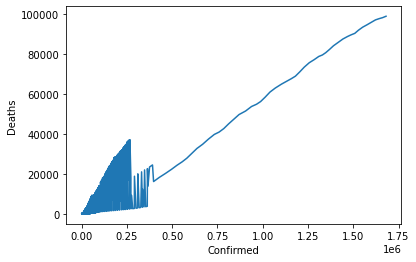

In [12]:
sns.lineplot(x="Confirmed",y="Deaths",data=data)

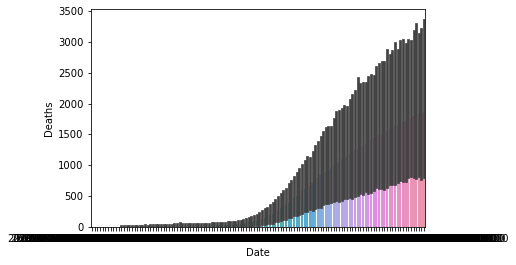

In [13]:
sns.barplot(x="Date",y="Deaths",data=data)

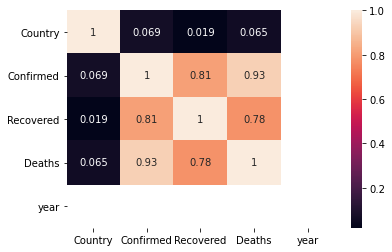

In [21]:
sns.heatmap(data.corr(),annot=True)

In [20]:
data["Country"]=pd.factorize(data.Country)[0]
data

,Date,Country,Confirmed,Recovered,Deaths,month,year,day,type_of_day
0,2020-01-22,0,0,0,0,January,2020,Wednesday,weekday
1,2020-01-22,1,0,0,0,January,2020,Wednesday,weekday
2,2020-01-22,2,0,0,0,January,2020,Wednesday,weekday
3,2020-01-22,3,0,0,0,January,2020,Wednesday,weekday
4,2020-01-22,4,0,0,0,January,2020,Wednesday,weekday
...,...,...,...,...,...,...,...,...,...
23683,2020-05-26,183,429,365,3,May,2020,Tuesday,weekday
23684,2020-05-26,184,9,6,1,May,2020,Tuesday,weekday
23685,2020-05-26,185,249,10,49,May,2020,Tuesday,weekday
23686,2020-05-26,186,920,336,7,May,2020,Tuesday,weekday


In [22]:
data.isnull().sum()

Date           0
Country        0
Confirmed      0
Recovered      0
Deaths         0
month          0
year           0
day            0
type_of_day    0
dtype: int64

In [23]:
x=data.drop(["Deaths","month","year","type_of_day","day","Date"],axis=1)
x

,Country,Confirmed,Recovered
0,0,0,0
1,1,0,0
2,2,0,0
3,3,0,0
4,4,0,0
...,...,...,...
23683,183,429,365
23684,184,9,6
23685,185,249,10
23686,186,920,336


In [24]:
y=data["Deaths"]
y

0         0
1         0
2         0
3         0
4         0
         ..
23683     3
23684     1
23685    49
23686     7
23687     4
Name: Deaths, Length: 23688, dtype: int64

In [27]:
max_r=0
for r in range(40,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.23,random_state=r)
    lg=LinearRegression()
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test)
    r2=r2_score(y_test,pred)
    if r2>max_r:
        max_r=r2
        final_r=r
print("max r2 score corresponding to",final_r,"is",max_r) 
print("MSE:",np.sqrt(mean_squared_error(y_test,pred)))

max r2 score corresponding to 96 is 0.9160187188701955
MSE: 1595.4064835164384


In [28]:
max_r=0
for r in range(40,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.23,random_state=r)
    kn=KNeighborsRegressor()
    kn.fit(x_train,y_train)
    pred=kn.predict(x_test)
    r2=r2_score(y_test,pred)
    if r2>max_r:
        max_r=r2
        final_r=r
print("max r2 score corresponding to",final_r,"is",max_r) 
print("MSE:",np.sqrt(mean_squared_error(y_test,pred)))

max r2 score corresponding to 79 is 0.9854222640842277
MSE: 744.9399416265544


In [29]:
from sklearn.ensemble import AdaBoostRegressor

max_r=0
for r in range(40,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.23,random_state=r)
    ad=AdaBoostRegressor()
    ad.fit(x_train,y_train)
    pred=ad.predict(x_test)
    r2=r2_score(y_test,pred)
    if r2>max_r:
        max_r=r2
        final_r=r
print("max r2 score corresponding to",final_r,"is",max_r) 
print("MSE:",np.sqrt(mean_squared_error(y_test,pred)))

max r2 score corresponding to 70 is 0.9505274274405403
MSE: 1142.2226268252305


In [30]:
import joblib

joblib.dump(kn,"covid19_model.pkl")

['covid19_model.pkl']